### Importing some important libraries in python for data analysis...

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Checking Customer Demographic data.

In [34]:
df_1=pd.read_excel('KPMG.xlsx',sheet_name='CustomerDemographic',skiprows=1)

In [21]:
df_1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [53]:
categorical = [var for var in df_1.columns if df_1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 9 categorical variables


In [54]:
numerical = [var for var in df_1.columns if df_1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 4 numerical variables


In [56]:
discrete = []
for var in categorical:
    if len(df_1[var].unique())<20:
        print(var, ' values: ', df_1[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

gender  values:  ['U' 'Male' 'Female' 'F' 'Femal' 'M']
job_industry_category  values:  ['IT' 'Retail' 'Property' 'Manufacturing' 'Health' 'Entertainment'
 'Financial Services' nan 'Argiculture' 'Telecommunications']
wealth_segment  values:  ['Affluent Customer' 'Mass Customer' 'High Net Worth']
deceased_indicator  values:  ['N' 'Y']
owns_car  values:  ['No' 'Yes']
There are 5 discrete variables


#### In th gender column there are redundat representation for male and female as M, F . Incomlete represenation as 'Femal' is also present

In [52]:
df_1.gender.unique()

array(['U', 'Male', 'Female', 'F', 'Femal', 'M'], dtype=object)

In [22]:
df_1=df_1.sort_values(by=['DOB'])

In [23]:
df_1=df_1.reset_index(drop=True)

In [24]:
df_1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
2,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
4,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0


#### The customer with customer id 34 has error in DOB.

,Total,Percent
job_industry_category,656,0.16400
job_title,506,0.12650
default,302,0.07550
last_name,125,0.03125
tenure,87,0.02175
DOB,87,0.02175
owns_car,0,0.00000
deceased_indicator,0,0.00000
wealth_segment,0,0.00000
past_3_years_bike_related_purchases,0,0.00000


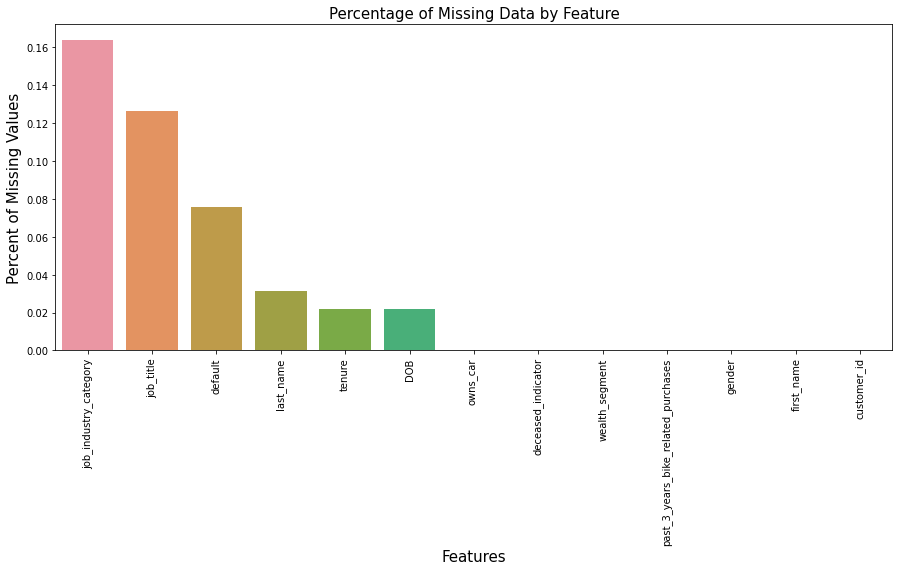

In [25]:
total = df_1.isnull().sum().sort_values(ascending=False)
percent = (df_1.isnull().sum()/df_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data

#### The missing value pecentage is show in the figure

In [41]:
df_1.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

#### The data types of each column seems to be good.

In [31]:
len(df_1.customer_id.unique())

4000

#### There seems to be no redundant copy.

### Checking New Customer List data.

In [33]:
df_2=pd.read_excel('KPMG.xlsx',sheet_name='NewCustomerList',skiprows=1)

In [35]:
df_2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [57]:
categorical = [var for var in df_2.columns if df_2[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 11 categorical variables


In [58]:
numerical = [var for var in df_2.columns if df_2[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [59]:
discrete = []
for var in categorical:
    if len(df_2[var].unique())<20:
        print(var, ' values: ', df_2[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

gender  values:  ['Male' 'Female' 'U']
job_industry_category  values:  ['Health' 'Financial Services' nan 'Manufacturing' 'IT' 'Retail'
 'Property' 'Telecommunications' 'Argiculture' 'Entertainment']
wealth_segment  values:  ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator  values:  ['N']
owns_car  values:  ['No' 'Yes']
state  values:  ['NSW' 'QLD' 'VIC']
country  values:  ['Australia']
There are 7 discrete variables


In [37]:
df_2=df_2.sort_values(by=['DOB'])

In [38]:
df_2=df_2.reset_index(drop=True)

In [39]:
df_2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Anthony,Morison,Male,7,1938-06-08,General Manager,Health,Mass Customer,N,No,...,NSW,Australia,9,1.03,1.030,1.28750,1.094375,797,797,0.60000
1,Zachariah,Meininking,Male,40,1938-06-09,Cost Accountant,Financial Services,Affluent Customer,N,Yes,...,NSW,Australia,7,0.56,0.700,0.70000,0.700000,883,883,0.53125
2,Andrea,Pendle,Female,86,1938-08-05,NaN,NaN,High Net Worth,N,Yes,...,QLD,Australia,6,0.58,0.725,0.90625,0.906250,760,760,0.63750
3,Letizia,Poore,Female,27,1938-08-30,Web Developer II,Manufacturing,Affluent Customer,N,No,...,VIC,Australia,3,0.81,0.810,0.81000,0.810000,583,583,0.78750
4,Alleen,Eaken,Female,56,1938-08-31,NaN,NaN,Mass Customer,N,No,...,NSW,Australia,12,0.64,0.640,0.80000,0.680000,259,259,1.06250


#### There are 5 columns without column name.

,Total,Percent
job_industry_category,165,0.165
job_title,106,0.106
last_name,29,0.029
DOB,17,0.017
Value,0,0.000
tenure,0,0.000
gender,0,0.000
past_3_years_bike_related_purchases,0,0.000
wealth_segment,0,0.000
deceased_indicator,0,0.000


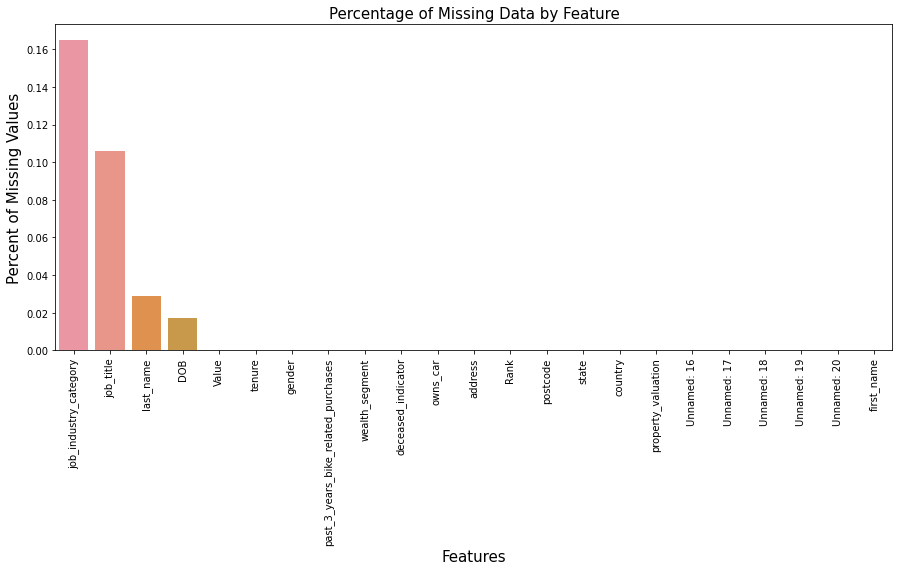

In [40]:
total = df_2.isnull().sum().sort_values(ascending=False)
percent = (df_2.isnull().sum()/df_2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data

#### The missing value percent is given in  the figure.

In [42]:
df_2.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                 

#### Data types of each column seems to  be good

In [45]:
k=df_2['first_name']+df_2['last_name']

In [47]:
len(k.unique())

972

In [48]:
df_2.shape

(1000, 23)

#### Redundant copy of data is present.

In [49]:
df_3=pd.read_excel('KPMG.xlsx',sheet_name='CustomerAddress',skiprows=1)

In [50]:
df_3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [61]:
categorical = [var for var in df_3.columns if df_3[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [62]:
numerical = [var for var in df_3.columns if df_3[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 3 numerical variables


In [63]:
discrete = []
for var in categorical:
    if len(df_3[var].unique())<20:
        print(var, ' values: ', df_3[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

state  values:  ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
country  values:  ['Australia']
There are 2 discrete variables


#### The state column contains multiple representation for a single state.

,Total,Percent
property_valuation,0,0.0
country,0,0.0
state,0,0.0
postcode,0,0.0
address,0,0.0
customer_id,0,0.0


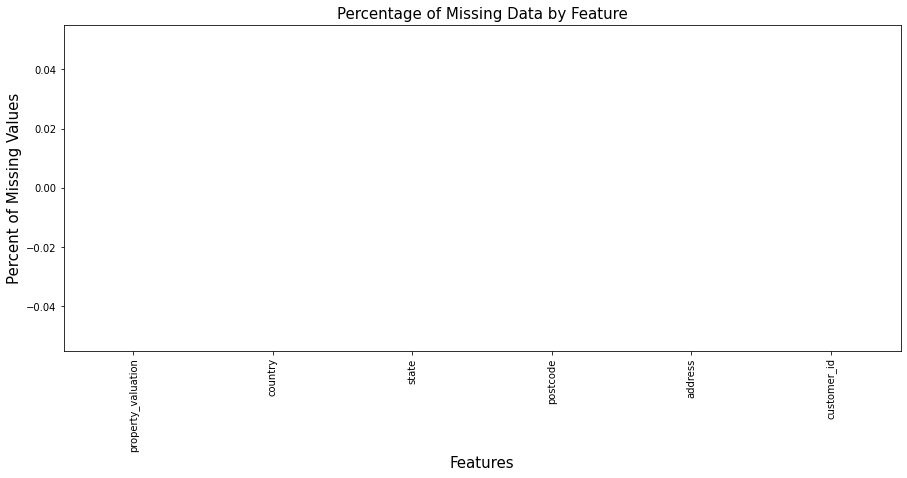

In [64]:
total = df_3.isnull().sum().sort_values(ascending=False)
percent = (df_3.isnull().sum()/df_3.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data

#### There seems to be no missing values.

In [68]:
len(df_3.customer_id.unique())

3999

In [70]:
df_3.shape

(3999, 6)

#### There seems to be no redundant data

## Mitigating different issues in data.

* For missig values we can ask for more data or fill it with mean, median, mode or some statistical methods. Another way is to remove tuple that have too much missing values.
* Multiple represntation of data such F and Female present in same feature can solved coneverting either of the two to a single format.
* Incomplete representation of data can solved by asking the client about the data representation or by studying about that particular feature in detail.
* Unnanmed feature must not be considered until the meaning of that particular feature is understood. The client must provide the details.
* Redundant copies of the data must be removed for consistency.